In [1]:
import pandas

In [2]:
df=pandas.read_csv("scmp2017.csv")

In [3]:
dfc=df["datetime"]=="2017-08-01"
df0801=df[dfc]
df0801

,Unnamed: 0,title,byline,dates,datetime
8519,9103,Beating the heat,NaN,01 Aug 2017,2017-08-01
8520,9089,Insurers need to share more data to fight agai...,NaN,01 Aug 2017,2017-08-01
8521,9090,Investor sentiment toward Chinese economy high...,NaN,01 Aug 2017,2017-08-01
8522,9091,China snips red tape for foreign investors in ...,NaN,01 Aug 2017,2017-08-01
8523,9114,Carrie Lam must put promises on youth developm...,NaN,01 Aug 2017,2017-08-01
8524,9113,China says it's not to blame for crisis in Nor...,NaN,01 Aug 2017,2017-08-01
8525,9112,Is Beijing's hardline stance on border rows bl...,NaN,01 Aug 2017,2017-08-01
8526,9111,Top Chinese magazine attacks fugitive tycoon o...,NaN,01 Aug 2017,2017-08-01
8527,9110,Joint checkpoint plan for rail link grants Hon...,NaN,01 Aug 2017,2017-08-01
8528,9109,Hong Kong home prices rise for 15th straight m...,NaN,01 Aug 2017,2017-08-01


In [4]:
titlelist=df0801["title"].tolist()
titlelist

['Beating the heat',
 'Insurers need to share more data to fight against increase in fraud cases: Proposal to set up a central database for tracking multiple claims could get mired in privacy issues',
 'Investor sentiment toward Chinese economy highest in two years, analysts say: Sentiment at highest since mid-2015 but dominance of state-owned firms, strict capital curbs and investment-driven growth model spark worries',
 'China snips red tape for foreign investors in global race for funds and expertise: New regulations mean firms from abroad must only fill out one set of forms before taking a stake in most Chinese companies, ministry says',
 'Carrie Lam must put promises on youth development into action',
 "China says it's not to blame for crisis in North Korea, as US piles on the pressure: Beijing hits back at Washington over the accusation that it has not done enough to rein in its neighbour's nuclear weapons programme",
 "Is Beijing's hardline stance on border rows blowing its defe

In [5]:
f = open('20170801scmp.txt','w')
for i in range(len(titlelist)):
    f.write(titlelist[i])
f.close()

In [6]:
import pandas as pd
import matplotlib.pyplot as plt                          
from PIL import Image
from scipy.misc import imread 
import numpy as np 
import seaborn as sns
import jieba
import wordcloud
from pylab import mpl 
from wordcloud import WordCloud, ImageColorGenerator,STOPWORDS
import imageio
def stopwordslist(filepath):  
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()]  
    return stopwords 

def getText(txt):
    text=open(txt,"r").read() 
    text=text.lower()                 
    for ch in '`!@#~$%^&*()_+-=*/{}[];,./?<>':
        text=text.replace(ch," ")  
    return text

def remove_stopwords(words):
    processed_word_list = []
    for word in words:
        word = word.lower() # in case they arenet all lower cased
        if word not in stopwords:
            processed_word_list.append(word)
    return processed_word_list

In [7]:
def word_count(processed_word_list):
    word_count = pandas.Series(processed_word_list).value_counts().sort_values(ascending=False)[0:20]  
    fig = plt.figure(figsize=(16,8))  
    x = word_count.index.tolist()  
    y = word_count.values.tolist()  
    sns.barplot(x, y, palette="BuPu_r")  
    plt.title('SCMP Top20')  
    plt.ylabel('count')  
    sns.despine(bottom=True)  
    #plt.savefig('/Users/xuyucan/SCMP词频统计.png',dpi=400)  
    plt.show() 

In [8]:
def tag_cloud(text):
    image = Image.open(r'./picture.jpg')
    graph = np.array(image)
    wc = WordCloud(mode='RGBA',background_color='white',max_words=2000,stopwords=stopwords,max_font_size=300,random_state=42,mask=graph)
    wc.generate(' '.join(text))
    img = imageio.imread(r"\users\xuwen\venv\test\ppp.jpg") 
    cloud_colors = wordcloud.ImageColorGenerator(np.array(img))
    cloud_colors.default_color = [0.6,0.6,0.6]
    wc.recolor(color_func=cloud_colors)
    #wc.to_file(r"/Users/xuyucan/SCMP_tagcloud.png") 
    plt.figure(figsize=(12,12))
    plt.imshow(wc.recolor(color_func=cloud_colors), interpolation='bilinear')
    plt.axis("off")
    plt.title('SCMP20170801', loc='Center', fontsize=20)
    plt.show()
    return plt.show()

In [9]:
stopwords = stopwordslist('./stopwords.txt')
stopwords
newstopwords = ['will','with',"in","china","kong","''china's","world","china's","amid","Chinese","china's","hongkong","says","say","hong","kong","kong's"]
stopwords.extend(newstopwords)
stopwords

['!!',
 '?!',
 '??',
 '!?',
 '`',
 '``',
 "''",
 '-lrb-',
 '-rrb-',
 '-lsb-',
 '-rsb-',
 ',',
 '.',
 ':',
 ';',
 '"',
 "'",
 '?',
 '<',
 '>',
 '{',
 '}',
 '[',
 ']',
 '+',
 '-',
 '(',
 ')',
 '&',
 '%',
 '$',
 '@',
 '!',
 '^',
 '#',
 '*',
 '..',
 '...',
 "'ll",
 "'s",
 "'m",
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 

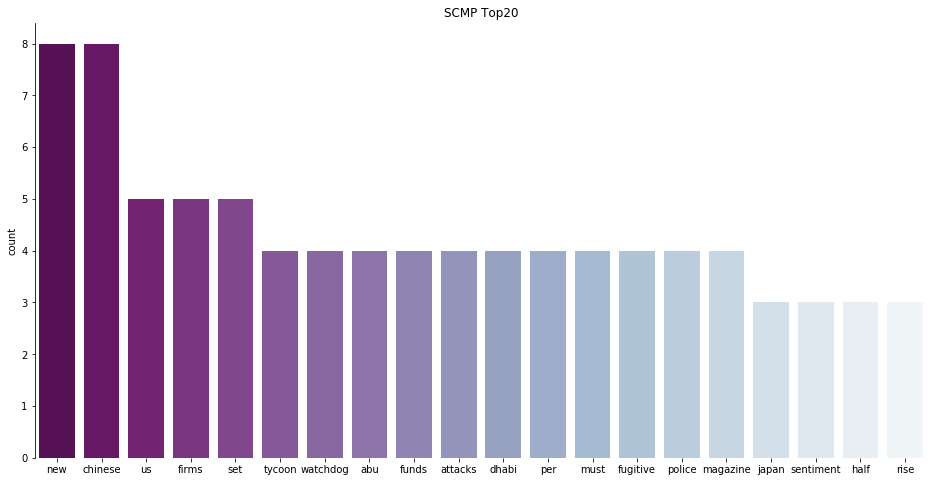

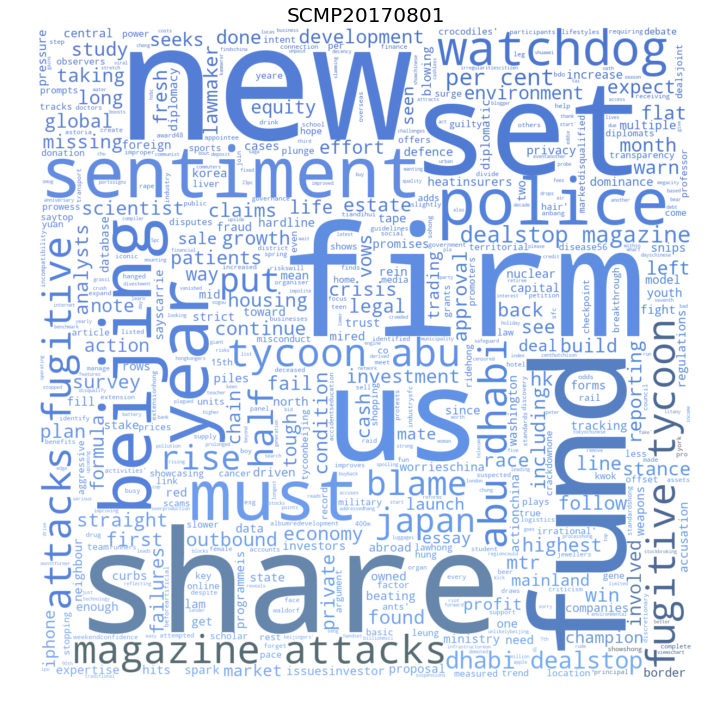

In [10]:
test=getText('./20170801scmp.txt')  
words=test.split()
processed_word_list = remove_stopwords(words)
word_count(processed_word_list)
tag_cloud(processed_word_list)